In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
import pickle
pd.options.display.max_seq_items = 2000

In [4]:
openfile=open( r"C:\Users\Joseph\Documents\Beamly\TakeHomeTask\beamly_case_study2.pickle", "rb")
df=pickle.load(openfile)
openfile.close()

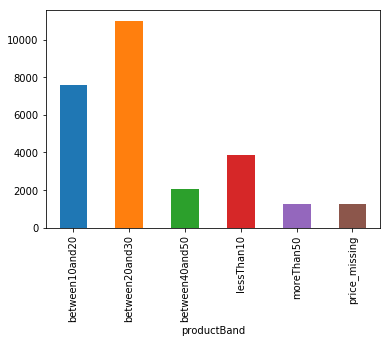

In [5]:
df.groupby(['productBand']).count()['city'].plot.bar()

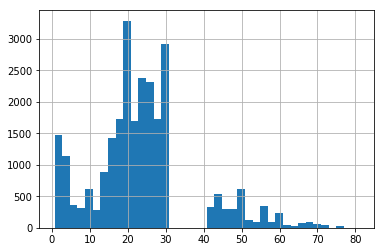

In [6]:
df['avg_price'].hist(bins=40)

In [69]:
data=df['avg_price'].values

In [77]:
total_no_prices=df['avg_price'].count()
total_no_prices

25853

In [70]:
data = data[np.isfinite(data)]

In [71]:
data

array([29.95, 27.95, 27.95, ..., 15.9 , 24.5 , 24.95])

(array([1.468e+03, 1.137e+03, 3.590e+02, 3.110e+02, 6.170e+02, 2.880e+02,
        8.860e+02, 1.423e+03, 1.731e+03, 3.285e+03, 1.696e+03, 2.371e+03,
        2.317e+03, 1.724e+03, 2.908e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.230e+02, 5.400e+02, 2.940e+02, 2.960e+02,
        6.080e+02, 1.230e+02, 9.300e+01, 3.430e+02, 9.700e+01, 2.280e+02,
        4.500e+01, 2.500e+01, 8.300e+01, 9.300e+01, 6.000e+01, 4.200e+01,
        0.000e+00, 3.600e+01, 1.000e+00, 2.000e+00]),
 array([ 0.75 ,  2.755,  4.76 ,  6.765,  8.77 , 10.775, 12.78 , 14.785,
        16.79 , 18.795, 20.8  , 22.805, 24.81 , 26.815, 28.82 , 30.825,
        32.83 , 34.835, 36.84 , 38.845, 40.85 , 42.855, 44.86 , 46.865,
        48.87 , 50.875, 52.88 , 54.885, 56.89 , 58.895, 60.9  , 62.905,
        64.91 , 66.915, 68.92 , 70.925, 72.93 , 74.935, 76.94 , 78.945,
        80.95 ]),
 <a list of 40 Patch objects>)

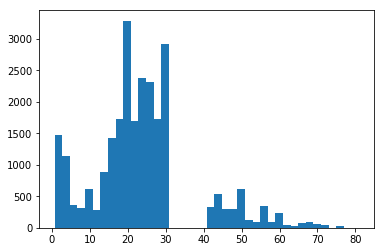

In [84]:
plt.hist(data,bins=40)

Will estimate sales for the missing band using a poisson distribution

In [72]:
from scipy.misc import factorial
from scipy.optimize import minimize, curve_fit

def poisson(k, lamb):
    """poisson pdf, parameter lamb is the fit parameter"""
    return (lamb**k/factorial(k)) * np.exp(-lamb)
def negLogLikelihood(params, data):
    """ the negative log-Likelohood-Function"""
    lnl = - np.sum(np.log(poisson(data, params[0])))
    return lnl
def gaussian(k,p):#p[0]=D,p[1]=st_dev,p[2]=Amplitude
    """gaussian pdf, paras are the fit parameters"""
    return p[2]/(p[1]*np.sqrt(2*np.pi))*np.exp(-(x-p[0])**2/(2*p[1]**2))+D #p[0]=mu (displace x), p[1]=sig (stdev), p[2]=A (amp), D=,meanmag
def gauss(x, p,D):#p[0]=mu,p[1]=st_dev,p[2]=Amplitude
    """gaussian pdf, paras are the fit parameters"""
    return p[2]/(p[1]*np.sqrt(2*np.pi))*np.exp(-(x-p[0])**2/(2*p[1]**2))+D #p[0]=mu (displace x), p[1]=sig (stdev), p[2]=A (amp), D=,meanmag

c:\users\joseph\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  
c:\users\joseph\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  
c:\users\joseph\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
c:\users\joseph\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


   direc: array([[-0.10358641]])
     fun: 163699.7537904674
 message: 'Optimization terminated successfully.'
    nfev: 41
     nit: 2
  status: 0
 success: True
       x: array(23.42852911)


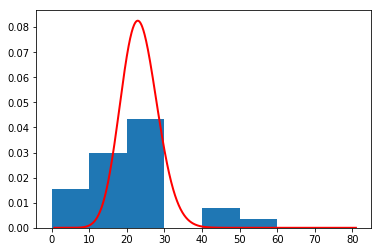

In [73]:
result = minimize(negLogLikelihood,  # function to minimize
                  x0=np.ones(1),     # start value
                  args=(data,),      # additional arguments for function
                  method='Powell',   # minimization method, see docs
                  )
# result is a scipy optimize result object, the fit parameters 
# are stored in result.x
print(result)

# plot poisson-deviation with fitted parameter
x_plot = np.linspace(min(data), max(data), 1000)
bins=[0,10,20,30,40,50,60]
plt.hist(data, bins=bins, normed=True)
plt.plot(x_plot, poisson(x_plot, result.x), 'r-', lw=2)

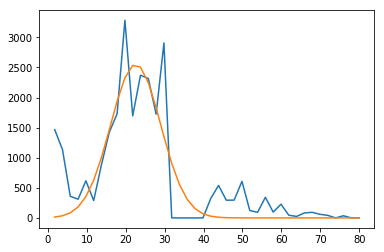

In [91]:
y,edges=np.histogram(data,bins=40)
x1=(edges+((edges[1]-edges[0])/2.0))[:-1]
o0=[20.,15.,1.]
errfunc = lambda o, x1, y: gauss(x1, o, 0) - y # Distance to the target function, similar to def function.
o1, success = opt.leastsq(errfunc, o0[:], args=(x1, y)) # p1 gives parameters
plt.figure()
plt.plot(x1,y)
plt.plot(x1,gauss(x1,o1,0))

In [94]:
Band20_30_avg_price_count=gauss(25,o1,0)
Band30_40_avg_price_count=gauss(35,o1,0)
Band40_50_avg_price_count=gauss(45,o1,0)
print(Band20_30_avg_price_count,Band30_40_avg_price_count,Band40_50_avg_price_count)

2376.478980998967 395.2576303785531 5.885448077160646


So what I've done is fit a Gaussian to the distribution of counts with average price. The histogram plots of this and the bands looked similar, but you can get more accurate fits with a larger distribution of values, so I used avg_price, instead of the bands. With the Gaussian fitted I then just calculate the count for each band next to the new line and the new line itself. Now I can benchmark the new line sales against sales from the other bands. This is all presuming that people purchase in a roughly Gaussian manner.

In [95]:
var1=Band30_40_avg_price_count/Band20_30_avg_price_count
var2=Band30_40_avg_price_count/Band40_50_avg_price_count
print(var1,var2)

0.16632069273021896 67.15846018800318


Can create a very simple function based on the benchmarked sales, to apply to columns in a dataframe

In [96]:
def salescount(B23,B45):
    var1,var2=0.16632069273021896,67.15846018800318
    return (var1*B23+var2*B45)/2.